<a href="https://colab.research.google.com/github/Kajlid/Final-project-Machine_Learning/blob/Magda/Project_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# LIBRARIES #
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import io
import sklearn
import sklearn.metrics  as metrics
from google.colab import files
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

In [2]:
# READ CSV #
warnings.filterwarnings('ignore')
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['student-por.csv'])) 

Saving student-por.csv to student-por.csv


In [3]:
# FIRST APPROACH TO THE DATASET #

# columns names #
data_names = ['school', 'sex', 'age', 'address', 'family_size', 'parent_cohabition_status', 'mother_education', 'father_education','mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'school_support', 'family_support', 'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences','grade_period1', 'grade_period2', 'final_grade' ]
data.columns = data_names

# numerical vs categorical columns #
numerical_columns = ['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences','grade_period1', 'grade_period2', 'final_grade']
categorical_columns = ["school","sex",'address', 'family_size', 'parent_cohabition_status','mother_job', 'father_job', 'reason', 'guardian',"school_support", "family_support",'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic']


In [4]:
# CLEAN THE DATABASE # 

# 1. Drop the columns that we are not going to use.
data_clean = data.drop(['grade_period1', 'grade_period2'], axis=1)

# 2. Drop na's.
data_clean=data.replace(r'^\s*$', np.nan, regex=True)
data_clean=data_clean.dropna(inplace=True)

# 3. Get the dummies so that it is easier to work. 
# This is, transform the categorical columns into numerical ones. 
data_clean = pd.get_dummies(data, columns=categorical_columns)

# 4. Transform the data. 
# we need to standarize the data to take into consideration variations in measurments, units and scales. 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clean[numerical_columns])
scaled_dataframe = pd.DataFrame(scaled_data, columns = numerical_columns)  
scaled_dataframe.head()

for column in numerical_columns:
  data_clean.append(scaled_dataframe[column])
  data_clean[column] = scaled_dataframe[column]

In [5]:
# LINEAR REGRESSION #

# 1. Split into training and testing data.
bm = data_clean.columns.isin(['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'family_size_GT3', 'family_size_LE3', 'parent_cohabition_status_A', 'parent_cohabition_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher', 'father_job_at_home', 'father_job_health', 'father_job_other','father_job_services', 
       'father_job_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 
       'school_support_yes','family_support_yes', 'paid_yes', 'extra_curricular_activities_yes', 'nursery_yes', 'higher_yes', 'internet_access_yes','romantic_yes'])
sc = data_clean.columns[bm]
X=data_clean[sc]

bm = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[bm]
y=data_clean[s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# 2. Fit the model and get the accuracy.
linear_model=LinearRegression()
linear_model.fit(X_train, y_train)
print("Linear regression:")
print("Accuracy:", linear_model.score(X_test,y_test))
print("\n")

# 3. Get the coefficients of the regression model:
coefficient={}
for coef, feat in zip(linear_model.coef_,X.columns):
  coefficient[feat]=coef
coefficient


Linear regression:
Accuracy: 0.23602088784847575




{'age': array([ 3.53472090e-02, -7.22293197e-04,  4.37468625e-02, -2.83965586e-02,
         1.09948167e-01, -2.39191262e-01,  6.54186840e-02, -5.64390747e-02,
        -3.74962586e-02, -1.05758973e-01,  6.15583940e-03, -6.82186307e-02,
        -6.00392465e-02, -3.08979887e+11, -3.08979887e+11, -6.58260466e+10,
        -6.58260466e+10, -1.05476828e+10, -1.05476828e+10, -4.47380298e+10,
        -4.47380298e+10,  4.72403893e+10,  4.72403893e+10, -1.45446458e+11,
        -1.45446458e+11, -1.45446458e+11, -1.45446458e+11, -1.45446458e+11,
         4.14975692e+10,  4.14975692e+10,  4.14975692e+10,  4.14975692e+10,
         4.14975692e+10,  7.89185163e+11,  7.89185163e+11,  7.89185163e+11,
         7.89185163e+11, -6.23645550e+11, -6.23645550e+11, -6.23645550e+11,
        -5.36274017e-01, -1.17700885e-02, -1.20740435e-01,  8.70892874e-02,
        -6.89082361e-02,  4.60991488e-01,  6.58057520e-02, -1.26136215e-01])}

In [9]:
# LASSO REGRESSION #

# 1. Split into training and testing data.
bm = data_clean.columns.isin(['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'family_size_GT3', 'family_size_LE3', 'parent_cohabition_status_A', 'parent_cohabition_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher', 'father_job_at_home', 'father_job_health', 'father_job_other','father_job_services', 
       'father_job_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 
       'school_support_yes','family_support_yes', 'paid_yes', 'extra_curricular_activities_yes', 'nursery_yes', 'higher_yes', 'internet_access_yes','romantic_yes'])
sc = data_clean.columns[bm]
X=data_clean[sc]

bm = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[bm]
y=data_clean[s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# 2. Fit the model and get the accuracy.
# Here we could use the function to get the best alpha. 
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# 3. Make the predictions.
y_pred = lasso_model.predict(X_test)

# 4. Get the slope and the intercept. 
# y = mx + b, where m represents the slope and b represents the y-intercept.
print("Slope",lasso_model.coef_[0])
print("Intercept:",lasso_model.intercept_)
print("\n")

# 5. Evaluate the performance of our model
# Method 1: mean squared error
# Disadvantage it's difficult to evaluate the performance of the model using MSE as the value of MSE can vary from 0 to any larger number
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error:", mse)

# Method 2: R2.
# The value of R2 varies between 0 and 1. 
r2=lasso_model.score(X_test,y_test)
print("R2:",r2)

Slope -0.0
Intercept: [-0.04277325]


Mean squared error: 0.8026994439517079
R2: 0.1887496956745427


In [6]:
# FEATURE SELECTION # 

bm = data_clean.columns.isin(['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'family_size_GT3', 'family_size_LE3', 'parent_cohabition_status_A', 'parent_cohabition_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher', 'father_job_at_home', 'father_job_health', 'father_job_other','father_job_services', 
       'father_job_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 
       'school_support_yes','family_support_yes', 'paid_yes', 'extra_curricular_activities_yes', 'nursery_yes', 'higher_yes', 'internet_access_yes','romantic_yes'])
sc = data_clean.columns[bm]
X=data_clean[sc]

bm = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[bm]
y=data_clean[s]

D = 8
est = SelectKBest(f_classif,k=D)
X_new = est.fit_transform(X, y)
sup = est.get_support()
featurenames = X.columns
print("Features selected are:")
for nn in np.where(sup)[0]:
  print(featurenames[nn])


Features selected are:
age
mother_education
father_education
failures
workday_alcohol
school_GP
school_MS
higher_yes


Linear regression:
Accuracy: 0.29839917798886606




Text(0, 0.5, 'Final grade')

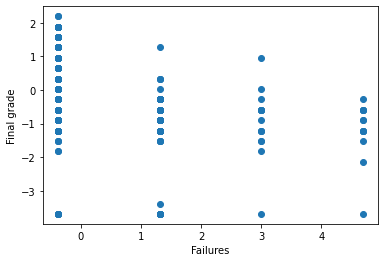

In [7]:
# LINEAR REGRESSION WITH FEATURES SELECTED #

# 1. Split into training and testing data.
bm = data_clean.columns.isin(["failures","school_MS","higher_yes","age", "mother_education","father_education","school_GP","workday_alcohol"])
sc = data_clean.columns[bm]
X=data_clean[sc]

bm = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[bm]
y=data_clean[s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# 2. Fit the model and get the accuracy.
linear_model=LinearRegression()
linear_model.fit(X_train, y_train)
print("Linear regression:")
print("Accuracy:", linear_model.score(X_test,y_test))
print("\n")

# 3. Plot the result.
bm = data_clean.columns.isin(["failures"])
sc = data_clean.columns[bm]
failures=data_clean[sc]
plt.scatter(failures,y)
plt.xlabel("Failures")
plt.ylabel("Final grade")

In [8]:
# LASSO REGRESION WITH FEATURES SELECTED #

# 1. Split into training and testing data.
bm = data_clean.columns.isin(["failures","school_MS","higher_yes","age", "mother_education","father_education","school_GP","workday_alcohol"])
sc = data_clean.columns[bm]
X=data_clean[sc]

bm = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[bm]
y=data_clean[s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# 2. Fit the model and get the accuracy.
# Here we could use the function to get the best alpha. 
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# 3. Make the predictions.
y_pred = lasso_model.predict(X_test)

# 4. Get the slope and the intercept. 
# y = mx + b, where m represents the slope and b represents the y-intercept.
print("Slope",lasso_model.coef_[0])
print("Intercept:",lasso_model.intercept_)
print("\n")

# 5. Evaluate the performance of our model
# Method 1: mean squared error
# Disadvantage it's difficult to evaluate the performance of the model using MSE as the value of MSE can vary from 0 to any larger number
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error:", mse)

# Method 2: R2.
# The value of R2 varies between 0 and 1. 
r2=lasso_model.score(X_test,y_test)
print("R2:",r2)

Slope -0.0
Intercept: [-0.0002409]


Mean squared error: 0.8252604072018707
R2: 0.16264239917669543
